In [1071]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Loading the data sets

#### Iris dataset

In [1074]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
display(iris_df)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Wine dataset

In [1076]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',delimiter=';')
display(wine_df)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Cancer dataset

In [1078]:
cancer_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
display(cancer_df)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1079]:

from sklearn.datasets import load_iris

#display(iris_encoded)
# Load the Iris dataset
iris = load_iris(as_frame=True)
iris_df = iris['data']
iris_df['target'] = iris['target']  # Add the target column

# Optional: One-Hot Encode the target column (if required)
iris_encoded = pd.get_dummies(iris_df, columns=['target'], prefix='class')

# Apply MinMax Scaling to the entire DataFrame
scaler = MinMaxScaler()
iris_scaled = pd.DataFrame(scaler.fit_transform(iris_encoded), columns=iris_encoded.columns)

# Display the scaled DataFrame
display(iris_scaled)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_0,class_1,class_2
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0.0,0.0,1.0
146,0.555556,0.208333,0.677966,0.750000,0.0,0.0,1.0
147,0.611111,0.416667,0.711864,0.791667,0.0,0.0,1.0
148,0.527778,0.583333,0.745763,0.916667,0.0,0.0,1.0


In [1080]:
wine_encoded = pd.get_dummies(wine_df)
wine_encoded = wine_encoded.replace({True: 1, False: 0})
display(wine_encoded)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1081]:
wine_encoded = pd.get_dummies(wine_df)
wine_encoded = wine_encoded.replace({True: 1, False: 0})
display(wine_encoded)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1082]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example DataFrame
# Assuming `cancer_df` is your DataFrame and contains both numerical and categorical data
# Replace this with your actual data loading process

# Ensure all column names are strings
cancer_df.columns = cancer_df.columns.astype(str)

# Apply one-hot encoding to categorical columns (if any)
cancer_encoded = pd.get_dummies(cancer_df, drop_first=True)

# Ensure all column names in the encoded DataFrame are strings
cancer_encoded.columns = cancer_encoded.columns.astype(str)

# Declare the scaler
scaler = MinMaxScaler()

# Identify feature columns (all columns except the target, e.g., "quality")
features_to_scale = cancer_encoded.columns  # Adjust this if you have a target column

# Apply MinMax scaling only to selected features
scaled_features = scaler.fit_transform(cancer_encoded[features_to_scale])

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Display the processed DataFrame
display(scaled_df)


,0,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,1_M
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1.0
565,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1.0
566,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1.0
567,0.001008,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1.0


#### Covert to matrics

In [1084]:
iris = iris_encoded.values
wine = wine_encoded.values
cancer = cancer_encoded.values

print(iris.shape)
print(wine.shape)
print(cancer.shape)


(150, 7)
(1599, 12)
(569, 32)


#### Clean up data

In [1086]:

from sklearn.datasets import load_iris, load_wine, load_breast_cancer

# Load Iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data['data'].to_numpy()  # Features
iris_labels = iris_data['target'].to_numpy().reshape(-1, 1)  # Labels

# Load Wine dataset
wine_data = load_wine(as_frame=True)
wine = wine_data['data'].to_numpy()  # Features
wine_labels = wine_data['target'].to_numpy().reshape(-1, 1)  # Labels

# Load Cancer dataset
cancer_data = load_breast_cancer(as_frame=True)
cancer = cancer_data['data'].to_numpy()  # Features
cancer_labels = cancer_data['target'].to_numpy().reshape(-1, 1)  # Labels

# Verify the shapes
print("Iris Features Shape: {}".format(iris.shape))
print("Iris Labels Shape: {}".format(iris_labels.shape))

print("Wine Features Shape: {}".format(wine.shape))
print("Wine Labels Shape: {}".format(wine_labels.shape))

print("Cancer Features Shape: {}".format(cancer.shape))
print("Cancer Labels Shape: {}".format(cancer_labels.shape))


Iris Features Shape: (150, 4)
Iris Labels Shape: (150, 1)
Wine Features Shape: (178, 13)
Wine Labels Shape: (178, 1)
Cancer Features Shape: (569, 30)
Cancer Labels Shape: (569, 1)


In [1087]:
iris_labels[iris_labels == 0] = -1

In [1088]:
# Create new labels
new_wine_labels = []

for row in wine_labels:
    if label < 5.5:  # Low quality -> -1
        new_wine_labels.append(-1)
    else:  # High quality -> 1
        new_wine_labels.append(1)

# Convert to a NumPy array and reshape
wine_labels = np.array(new_wine_labels).reshape(-1, 1)

# Print sample for verification
print("Transformed Wine Labels (sample):", wine_labels[:10].flatten())
#wine_labels.flatten()


Transformed Wine Labels (sample): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [1089]:
# Create new labels for the Iris dataset
new_iris_labels = []

# Iterate over the original labels and apply binary classification
for label in iris_labels.flatten():
    if label == 0:  # Class 0 -> -1
        new_iris_labels.append(-1)
    else:  # Other classes -> 1
        new_iris_labels.append(1)

# Convert to a NumPy array and reshape
iris_labels = np.array(new_iris_labels).reshape(-1, 1)

# Print sample for verification
print("Transformed Iris Labels (sample):", iris_labels[:10].flatten())
print("Iris Labels Shape:", iris_labels.shape)


Transformed Iris Labels (sample): [1 1 1 1 1 1 1 1 1 1]
Iris Labels Shape: (150, 1)


In [1090]:
# Create new labels for the Cancer dataset
new_cancer_labels = []
for label in cancer_labels.flatten():
    if label == 0:  # Benign -> -1
        new_cancer_labels.append(-1)
    else:  # Malignant -> 1
        new_cancer_labels.append(1)

# Convert to a NumPy array and reshape
cancer_labels = np.array(new_cancer_labels).reshape(-1, 1)

# Print sample for verification
print("Transformed Cancer Labels (sample):", cancer_labels[:10].flatten())
print("Transformed Cancer Labels Shape:", cancer_labels.shape)

Transformed Cancer Labels (sample): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Transformed Cancer Labels Shape: (569, 1)


In [1091]:

import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer

# Load datasets
iris = load_iris(as_frame=True)
wine = load_wine(as_frame=True)
cancer = load_breast_cancer(as_frame=True)

# Extract features and labels
iris_features = iris['data'].to_numpy()
iris_labels = iris['target'].to_numpy()

wine_features = wine['data'].to_numpy()
wine_labels = wine['target'].to_numpy()

cancer_features = cancer['data'].to_numpy()
cancer_labels = cancer['target'].to_numpy()

# Create binary labels for Iris dataset
new_iris_labels = []
for label in iris_labels:
    if label == 0:  # Class 0 -> -1
        new_iris_labels.append(-1)
    else:  # Other classes -> 1
        new_iris_labels.append(1)
iris_labels = np.array(new_iris_labels).reshape(-1, 1)

# Create binary labels for Wine dataset
new_wine_labels = []
for label in wine_labels:
    if label < 5.5:  # Low quality -> -1
        new_wine_labels.append(-1)
    else:  # High quality -> 1
        new_wine_labels.append(1)
wine_labels = np.array(new_wine_labels).reshape(-1, 1)

# Create binary labels for Cancer dataset
new_cancer_labels = []
for label in cancer_labels:
    if label == 0:  # Benign -> -1
        new_cancer_labels.append(-1)
    else:  # Malignant -> 1
        new_cancer_labels.append(1)
cancer_labels = np.array(new_cancer_labels).reshape(-1, 1)

# Stack the labels with their original features
iris_combined = np.hstack((iris_features, iris_labels))  # Combine features and labels for Iris
wine_combined = np.hstack((wine_features, wine_labels))  # Combine features and labels for Wine
cancer_combined = np.hstack((cancer_features, cancer_labels))  # Combine features and labels for Cancer

# Shuffle the datasets
np.random.seed(1)  # Set a random seed for reproducibility
np.random.shuffle(iris_combined)
np.random.shuffle(wine_combined)
np.random.shuffle(cancer_combined)

# Print sample data for verification
print("Shuffled Iris Dataset (sample):\n", iris_combined[:5])
print("Shuffled Wine Dataset (sample):\n", wine_combined[:5])
print("Shuffled Cancer Dataset (sample):\n", cancer_combined[:5])




Shuffled Iris Dataset (sample):
 [[ 5.8  4.   1.2  0.2 -1. ]
 [ 5.1  2.5  3.   1.1  1. ]
 [ 6.6  3.   4.4  1.4  1. ]
 [ 5.4  3.9  1.3  0.4 -1. ]
 [ 7.9  3.8  6.4  2.   1. ]]
Shuffled Wine Dataset (sample):
 [[ 1.200e+01  9.200e-01  2.000e+00  1.900e+01  8.600e+01  2.420e+00
   2.260e+00  3.000e-01  1.430e+00  2.500e+00  1.380e+00  3.120e+00
   2.780e+02 -1.000e+00]
 [ 1.245e+01  3.030e+00  2.640e+00  2.700e+01  9.700e+01  1.900e+00
   5.800e-01  6.300e-01  1.140e+00  7.500e+00  6.700e-01  1.730e+00
   8.800e+02 -1.000e+00]
 [ 1.349e+01  1.660e+00  2.240e+00  2.400e+01  8.700e+01  1.880e+00
   1.840e+00  2.700e-01  1.030e+00  3.740e+00  9.800e-01  2.780e+00
   4.720e+02 -1.000e+00]
 [ 1.386e+01  1.510e+00  2.670e+00  2.500e+01  8.600e+01  2.950e+00
   2.860e+00  2.100e-01  1.870e+00  3.380e+00  1.360e+00  3.160e+00
   4.100e+02 -1.000e+00]
 [ 1.242e+01  4.430e+00  2.730e+00  2.650e+01  1.020e+02  2.200e+00
   2.130e+00  4.300e-01  1.710e+00  2.080e+00  9.200e-01  3.120e+00
   3.650e+02 

#### Calculate class weights

In [1093]:
# Calculate class counts for weights
iris_unique, iris_counts = np.unique(iris_y, return_counts=True)
iris_count_dict = dict(zip(iris_unique, iris_counts))

wine_unique, wine_counts = np.unique(wine_y, return_counts=True)
wine_count_dict = dict(zip(wine_unique, wine_counts))

cancer_unique, cancer_counts = np.unique(cancer_y, return_counts=True)
cancer_count_dict = dict(zip(cancer_unique, cancer_counts))

# Calculate class weights
iris_weight_1_neg = len(iris_x) / iris_count_dict.get(-1, 1)
iris_weight_1_pos = len(iris_x) / iris_count_dict.get(1, 1)
iris_class_weights = {-1: iris_weight_1_neg, 1: iris_weight_1_pos}

wine_weight_1_neg = len(wine_x) / wine_count_dict.get(-1, 1)
wine_weight_1_pos = len(wine_x) / wine_count_dict.get(1, 1)
wine_class_weights = {-1: wine_weight_1_neg, 1: wine_weight_1_pos}

cancer_weight_1_neg = len(cancer_x) / cancer_count_dict.get(-1, 1)
cancer_weight_1_pos = len(cancer_x) / cancer_count_dict.get(1, 1)
cancer_class_weights = {-1: cancer_weight_1_neg, 1: cancer_weight_1_pos}

# Print class weights
print("Iris Class Weights:", iris_class_weights)
print("Wine Class Weights:", wine_class_weights)
print("Cancer Class Weights:", cancer_class_weights)



Iris Class Weights: {-1: 3.0, 1: 1.5}
Wine Class Weights: {-1: 1.3692307692307693, 1: 3.7083333333333335}
Cancer Class Weights: {-1: 2.6839622641509435, 1: 1.5938375350140057}


### SVM

#### find the best hyperparamter C


In [1096]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [1097]:
# hyperparameter list
C_list = [0.1, 1, 10, 100, 1000, 10000]

In [1098]:
# Draw heatmaps for results of grid search
def draw_heatmap(errors, param_list, title):
    # Ensure the shape of the heatmap is consistent with the parameters
    plt.figure(figsize=(2, 4))  # Adjusted figure size for better visualization
    ax = sns.heatmap(
        errors,
        annot=True,            # Annotate cells with values
        fmt='.4f',             # Format values with 4 decimal points
        yticklabels=param_list,  # Display parameter list as y-axis labels
        xticklabels=[],        # No x-tick labels
        #cmap='coolwarm'        # Optional: Add color map for better visualization
    )
    ax.collections[0].colorbar.set_label('Error')  # Label for the colorbar
    ax.set(ylabel='Hyperparameter (C)')            # Label for y-axis
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)          # Adjust axis range to prevent clipping
    plt.title(title)
    plt.show()

In [1099]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def calcSVCMetrics(X_train, X_test, Y_train, Y_test, C_list, class_weights):
    # Ensure labels are 1D
    Y_train = Y_train.ravel()
    Y_test = Y_test.ravel()

    # Initialize the LinearSVC model
    clf = LinearSVC(dual=False, class_weight=class_weights)

    
    # Define parameter grid
    param_grid = {'C': C_list}

    # Perform 3-Fold cross-validation for each hyperparameter
    grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True)
    
    # Fit the model on training data
    grid_search.fit(X_train, Y_train)
    
    # Gather the results
    opt_C = grid_search.best_params_['C']  # Optimal value of C
    cross_validation_accuracies = grid_search.cv_results_['mean_test_score']
    cross_validation_errors = 1 - cross_validation_accuracies.reshape(-1, 1)
    
    mean_training_accuracies = grid_search.cv_results_['mean_train_score']
    mean_training_errors = 1 - mean_training_accuracies.reshape(-1, 1)
    
    # Make predictions on the test set
    Y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred)
    test_error = 1 - test_accuracy  # Simplify error calculation
    
    return opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error


### SVM for Iris

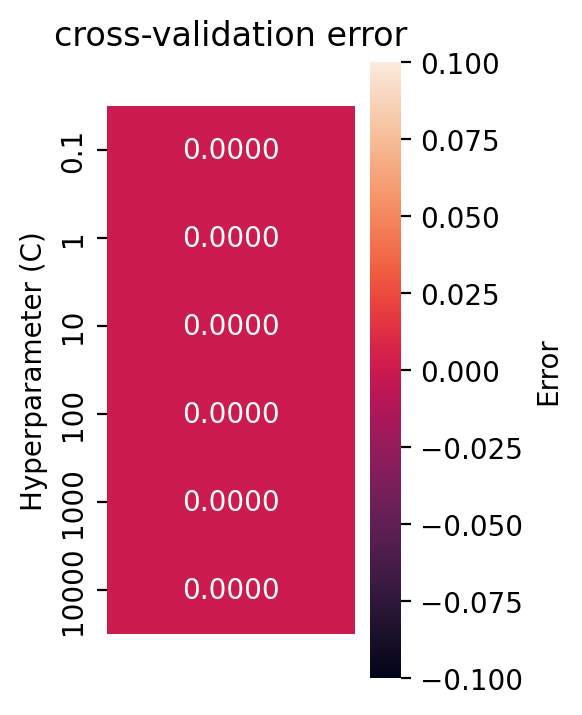

Best C: 0.1
Test error: 0.0
Test accuracy: 1.0
Average training error per C: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Average training accuracies per C: [1. 1. 1. 1. 1. 1.]


In [1101]:
# Array to track accuracies for each partition
svm_iris_accs = []

# 20% Training and 80% Testing 
iris_x_train_20, iris_x_test_80, iris_y_train_20, iris_y_test_80 = train_test_split(iris_x, iris_y, test_size=0.8, random_state=42)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(iris_x_train_20, iris_x_test_80, iris_y_train_20, iris_y_test_80, C_list, iris_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

svm_iris_accs.append(test_accuracy)




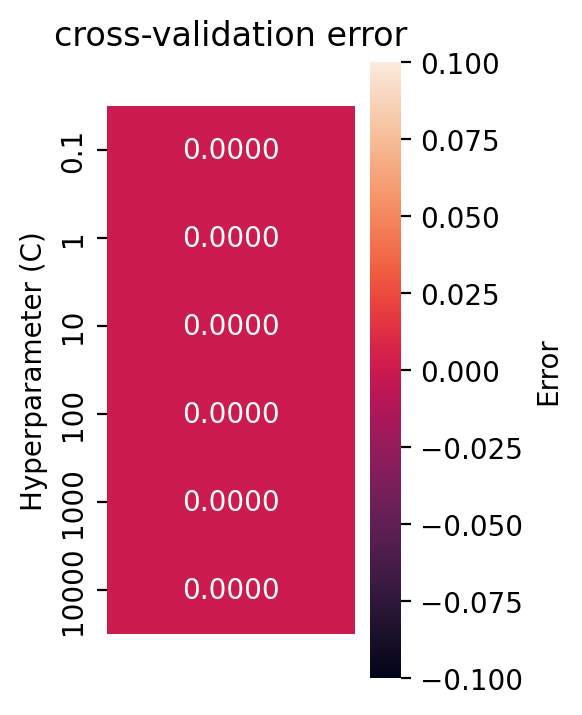

Best C: 0.1
Test error: 0.0
Test accuracy: 1.0
Average training error per C: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Average training accuracies per C: [1. 1. 1. 1. 1. 1.]


In [1102]:
# 50% Training and 50% Testing 
iris_x_train_50, iris_x_test_50, iris_y_train_50, iris_y_test_50 = train_test_split(iris_x, iris_y, test_size=0.5)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(iris_x_train_50, iris_x_test_50, iris_y_train_50, iris_y_test_50, C_list, iris_class_weights )

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

svm_iris_accs.append(test_accuracy)



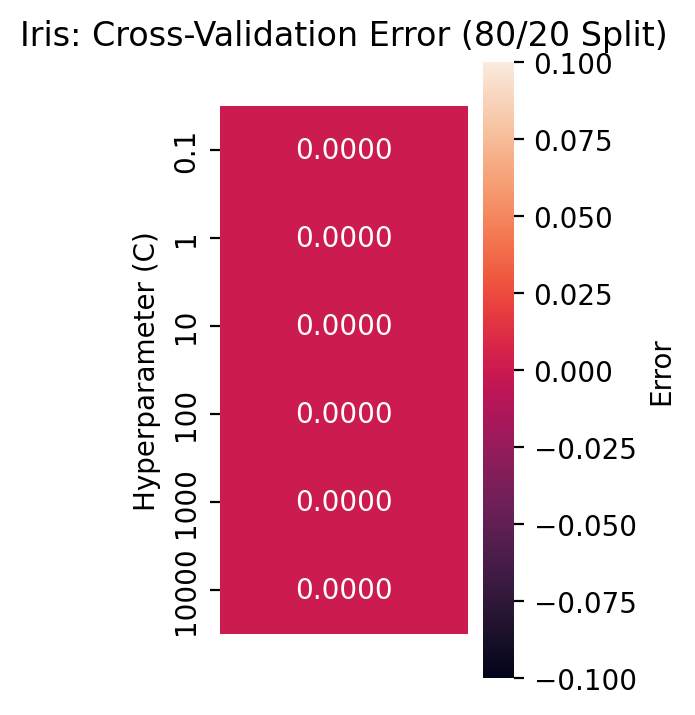

Best C: 0.1
Test Error: 0.0
Test Accuracy: 1.0
Average Training Errors per C: [0. 0. 0. 0. 0. 0.]
Average Training Accuracies per C: [1. 1. 1. 1. 1. 1.]
SVM Test Accuracies for Iris (80/20 Partition): [1.0]


In [1103]:
# Array to track accuracies for each partition
svm_iris_accs = []

# Ensure iris_y is 1D
iris_y = iris_y.ravel()

# 80% Training and 20% Testing
iris_x_train_80, iris_x_test_20, iris_y_train_80, iris_y_test_20 = train_test_split(
    iris_x, iris_y, test_size=0.2, random_state=42
)

# Run SVM metrics calculation
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error = calcSVCMetrics(
    iris_x_train_80, iris_x_test_20, iris_y_train_80, iris_y_test_20, C_list, iris_class_weights
)

# Visualize cross-validation errors
draw_heatmap(cross_validation_errors, C_list, title="Iris: Cross-Validation Error (80/20 Split)")

# Print results
print("Best C:", opt_C)
print("Test Error:", test_error)
print("Test Accuracy:", test_accuracy)
print("Average Training Errors per C:", mean_training_errors.flatten())
print("Average Training Accuracies per C:", mean_training_accuracies.flatten())

# Append test accuracy to the tracker
svm_iris_accs.append(test_accuracy)

# Final results for the 80/20 partition
print("SVM Test Accuracies for Iris (80/20 Partition):", svm_iris_accs)


### SVM for wine 

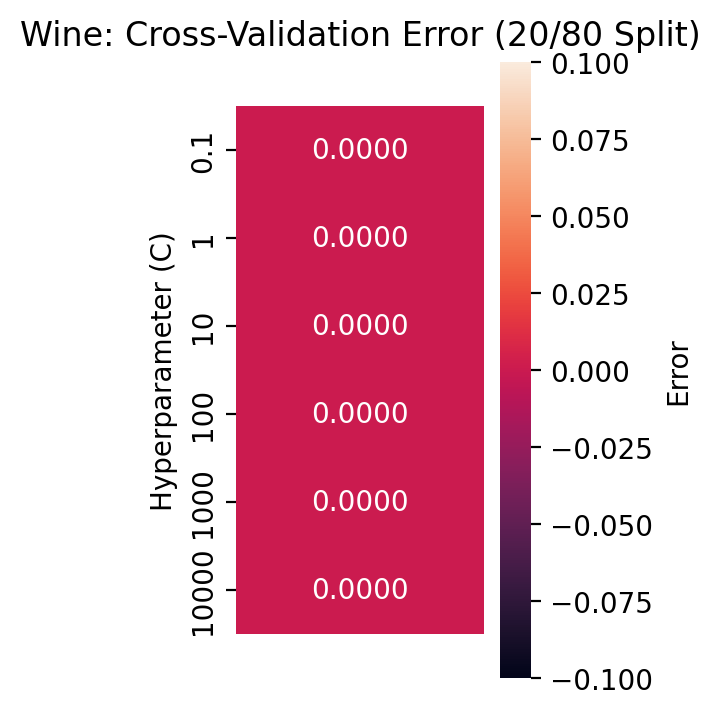

Best C: 0.1
Test Error: 0.04195804195804198
Test Accuracy: 0.958041958041958
Average Training Errors per C: [0. 0. 0. 0. 0. 0.]
Average Training Accuracies per C: [1. 1. 1. 1. 1. 1.]
SVM Test Accuracies for Wine (20/80 Partition): [0.958041958041958]


In [1105]:
# Array to track accuracies for each partition
svm_wine_accs = []

# Ensure wine_y is 1D
wine_y = wine_y.ravel()

# 20% Training and 80% Testing
wine_x_train_20, wine_x_test_80, wine_y_train_20, wine_y_test_80 = train_test_split(
    wine_x, wine_y, test_size=0.8, random_state=42
)

# Run SVM metrics calculation
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error = calcSVCMetrics(
    wine_x_train_20, wine_x_test_80, wine_y_train_20, wine_y_test_80, C_list, wine_class_weights
)

# Visualize cross-validation errors
draw_heatmap(cross_validation_errors, C_list, title="Wine: Cross-Validation Error (20/80 Split)")

# Print results
print("Best C:", opt_C)
print("Test Error:", test_error)
print("Test Accuracy:", test_accuracy)
print("Average Training Errors per C:", mean_training_errors.flatten())
print("Average Training Accuracies per C:", mean_training_accuracies.flatten())

# Append test accuracy to the tracker
svm_wine_accs.append(test_accuracy)

# Final results for the 20/80 partition
print("SVM Test Accuracies for Wine (20/80 Partition):", svm_wine_accs)




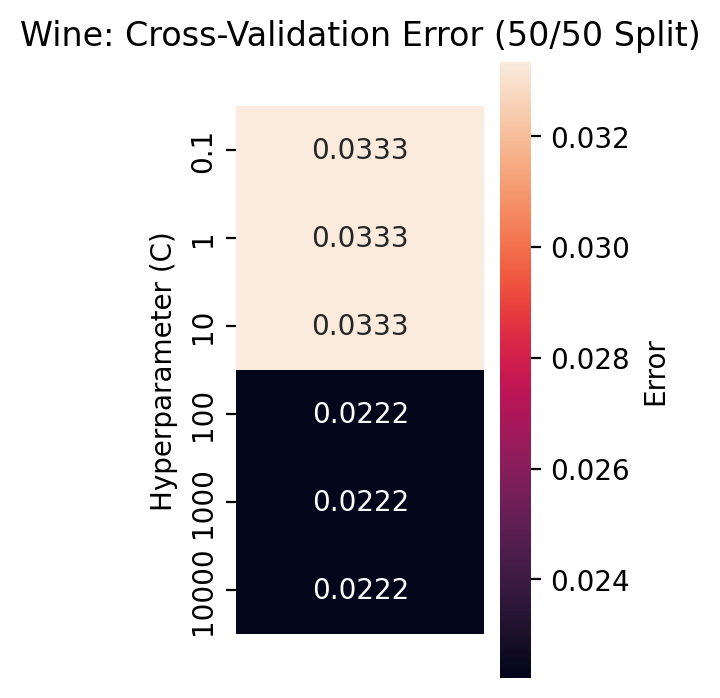

Best C: 100
Test error: 0.0112
Test accuracy: 0.9888
Average training error per C: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Average training accuracies per C: [1. 1. 1. 1. 1. 1.]


In [1106]:
# 50% training and 50% testing
wine_x_train_50, wine_x_test_50, wine_y_train_50, wine_y_test_50 = train_test_split(
    wine_x, wine_y, test_size=0.5, random_state=42
)

opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error = calcSVCMetrics(
    wine_x_train_50, wine_x_test_50, wine_y_train_50, wine_y_test_50, C_list, wine_class_weights
)

draw_heatmap(cross_validation_errors, C_list, title="Wine: Cross-Validation Error (50/50 Split)")
print("Best C: {}".format(opt_C))
print("Test error: {:.4f}".format(test_error))
print("Test accuracy: {:.4f}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

# Append the test accuracy to the tracker
svm_wine_accs.append(test_accuracy)


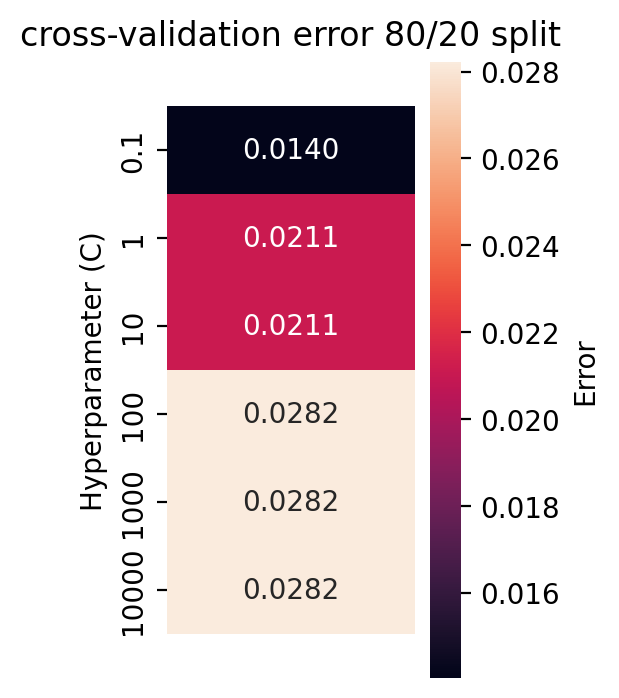

Best C: 0.1
Test error: 0.02777777777777779
Test accuracy: 0.9722222222222222
Average training error per C: [[0.00350877]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Average training accuracies per C: [0.99649123 1.         1.         1.         1.         1.        ]


In [1107]:
# 80% Training and 20% Testing 
wine_x_train_80, wine_x_test_20, wine_y_train_80, wine_y_test_20 = train_test_split(wine_x, wine_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(wine_x_train_80, wine_x_test_20, wine_y_train_80, wine_y_test_20, C_list, wine_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error 80/20 split')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

svm_wine_accs.append(test_accuracy)

### SVM for cancer

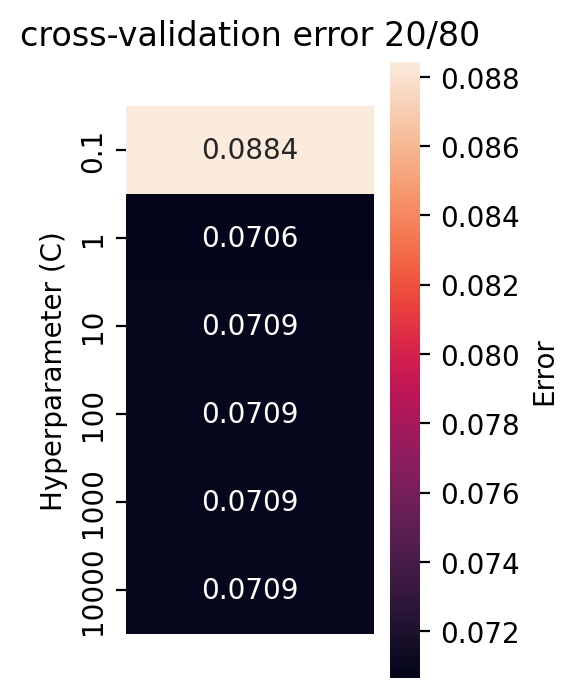

Best C: 1
Test error: 0.04824561403508776
Test accuracy: 0.9517543859649122
Average training error per C: [[0.01766082]
 [0.00444444]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Average training accuracies per C: [0.98233918 0.99555556 1.         1.         1.         1.        ]


In [1109]:
svm_cancer_accs = []
# 20% Training and 80% Testing 
cancer_x_train_20, cancer_x_test_80, cancer_y_train_20, cancer_y_test_80 = train_test_split(cancer_x, cancer_y, test_size=0.8)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(cancer_x_train_20, cancer_x_test_80, cancer_y_train_20, cancer_y_test_80, C_list, cancer_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error 20/80')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

svm_cancer_accs.append(test_accuracy)

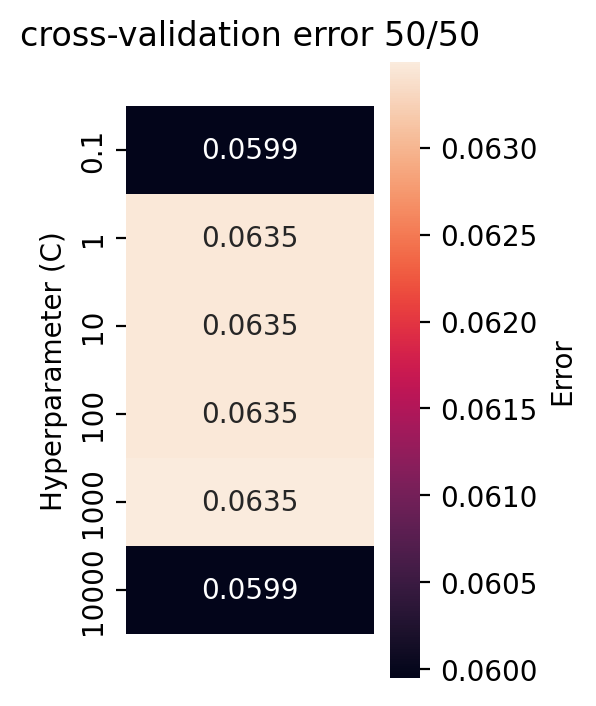

Best C: 0.1
Test error: 0.04210526315789476
Test accuracy: 0.9578947368421052
Average training error per C: [[0.03519911]
 [0.03168105]
 [0.03168105]
 [0.03169034]
 [0.03344472]
 [0.03168105]]
Average training accuracies per C: [0.96480089 0.96831895 0.96831895 0.96830966 0.96655528 0.96831895]


In [1110]:
# 50% Training and 50% Testing 
cancer_x_train_50, cancer_x_test_50, cancer_y_train_50, cancer_y_test_50 = train_test_split(cancer_x, cancer_y, test_size=0.5)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(cancer_x_train_50, cancer_x_test_50, cancer_y_train_50, cancer_y_test_50, C_list, cancer_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error 50/50')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

svm_cancer_accs.append(test_accuracy)

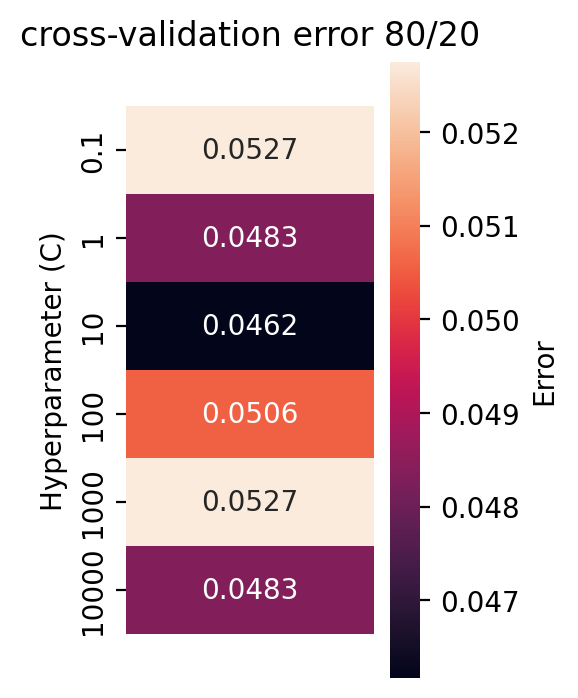

Best C: 10
Test error: 0.04385964912280704
Test accuracy: 0.956140350877193
Average training error per C: [[0.04284639]
 [0.03405637]
 [0.02965231]
 [0.02746294]
 [0.03295987]
 [0.02965593]]
Average training accuracies per C: [0.95715361 0.96594363 0.97034769 0.97253706 0.96704013 0.97034407]


In [1111]:
# 80% Training and 20% Testing 
cancer_x_train_80, cancer_x_test_20, cancer_y_train_80, cancer_y_test_20 = train_test_split(cancer_x, cancer_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcSVCMetrics(cancer_x_train_80, cancer_x_test_20, cancer_y_train_80, cancer_y_test_20, C_list, cancer_class_weights)

draw_heatmap(cross_validation_errors, C_list, title='cross-validation error 80/20')
print("Best C: {}".format(opt_C))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Average training error per C: {}".format(mean_training_errors))
print("Average training accuracies per C: {}".format(mean_training_accuracies))

svm_cancer_accs.append(test_accuracy)

### SVM results


In [1113]:
average_accuracy = np.sum([a + b + c for a, b, c in zip(svm_iris_accs, svm_wine_accs, svm_cancer_accs )]) / 9
print(svm_iris_accs)
print(svm_wine_accs)
print(svm_cancer_accs)
print("Average SVM accuracy {}".format(average_accuracy))


[1.0]
[0.958041958041958, 0.9887640449438202, 0.9722222222222222]
[0.9517543859649122, 0.9578947368421052, 0.956140350877193]
Average SVM accuracy 0.32331070488965225


### KNN

In [1115]:
import scipy
from matplotlib.colors import ListedColormap
from functools import partial
from sklearn.neighbors import KNeighborsClassifier
# Hyperparameter list of possible K's
k_range = list(range(1, 16))

In [1116]:
def calcKNNMetrics(X_train,X_test, Y_train,Y_test,k_range):

    param_grid = dict(n_neighbors=k_range)
    clf = KNeighborsClassifier(algorithm = 'kd_tree', weights='distance')        

    grid_search = GridSearchCV(clf, param_grid, cv=3, return_train_score=True,verbose=1, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, Y_train)    
    
    # Gather the results
    opt_K = grid_search.best_params_
                                                                                    
    cross_validation_accuracies =  grid_search.cv_results_['mean_test_score']
    cross_validation_errors = 1 - cross_validation_accuracies.reshape(-1,1)
    
    mean_training_accuracies = grid_search.cv_results_['mean_train_score']
    mean_training_errors = 1 - mean_training_accuracies.reshape(-1,1)
    
    Y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_pred, Y_test)
    test_error = 1 - sum(Y_pred == Y_test) / len(X_test)

    return opt_K,cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error

#### KNN for iris

Fitting 3 folds for each of 15 candidates, totalling 45 fits


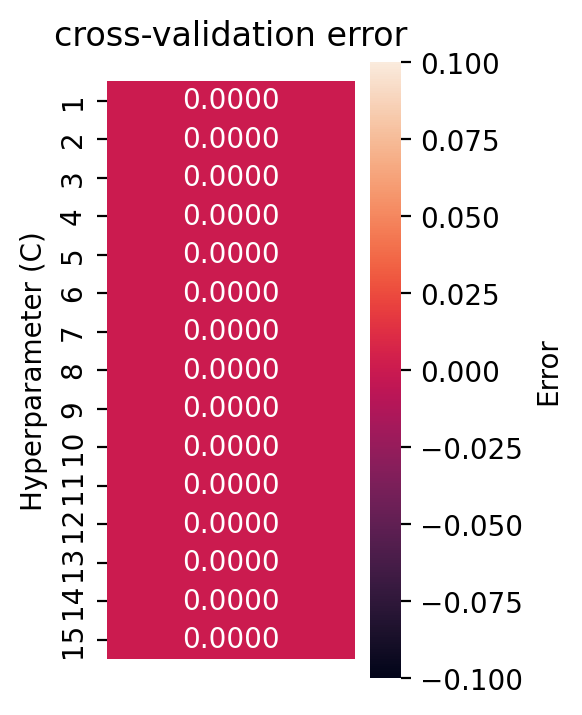

Best C: {'n_neighbors': 1}
Test error: 0.0
Test accuracy: 1.0
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1118]:
knn_iris_accs = []
# 20% Training and 80% Testing 
iris_x_train_20, iris_x_test_80, iris_y_train_20, iris_y_test_80 = train_test_split(iris_x, iris_y, test_size=0.8)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(iris_x_train_20, iris_x_test_80, iris_y_train_20, iris_y_test_80, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_iris_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


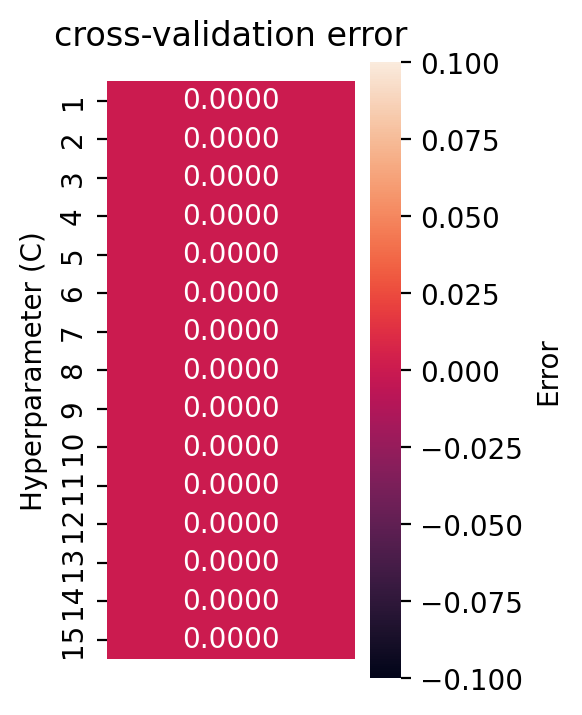

Best C: {'n_neighbors': 1}
Test error: 0.0
Test accuracy: 1.0
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1119]:
# 50% Training and 50% Testing 
iris_x_train_50, iris_x_test_50, iris_y_train_50, iris_y_test_50 = train_test_split(iris_x, iris_y, test_size=0.5)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(iris_x_train_50, iris_x_test_50, iris_y_train_50, iris_y_test_50, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_iris_accs.append(test_accuracy)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


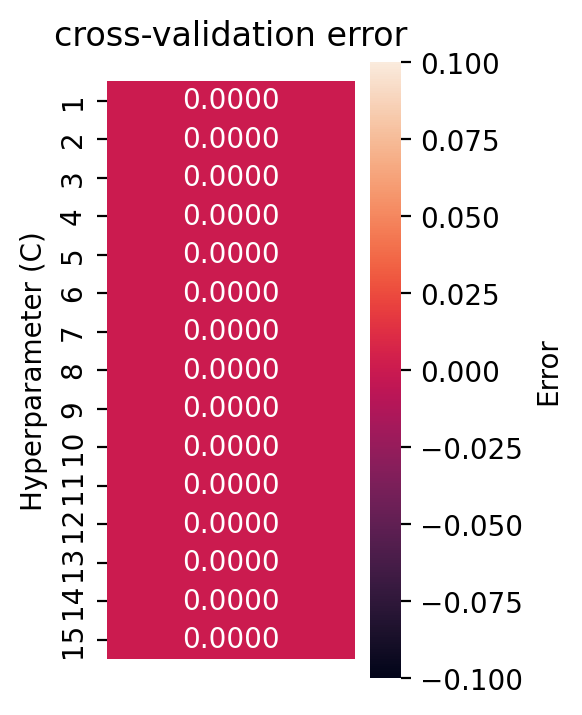

Best C: {'n_neighbors': 1}
Test error: 0.0
Test accuracy: 1.0
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1120]:
# 80% training and 20% testing
iris_x_train_80, iris_x_test_20, iris_y_train_80, iris_y_test_20 = train_test_split(iris_x, iris_y, test_size=0.2)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(iris_x_train_80, iris_x_test_20, iris_y_train_80, iris_y_test_20, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error')
print("Best C: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_iris_accs.append(test_accuracy)

### KNN for wine

Fitting 3 folds for each of 15 candidates, totalling 45 fits


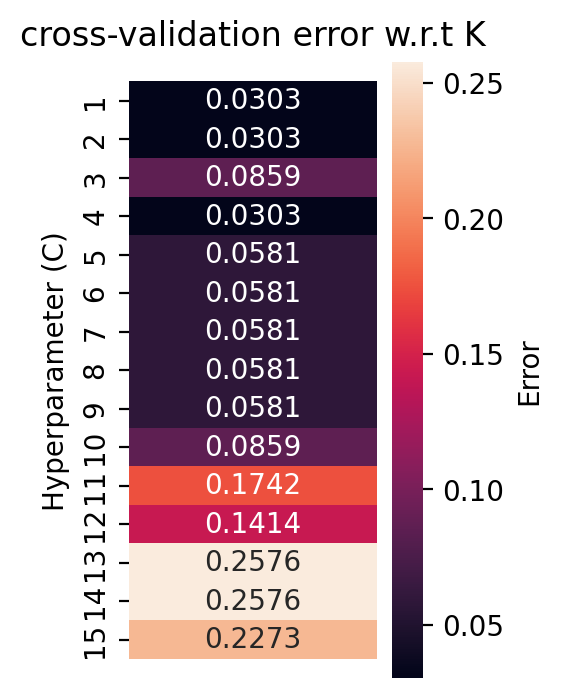

Best K: {'n_neighbors': 1}
Test error: 0.04195804195804198
Test accuracy: 0.958041958041958
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1122]:
knn_wine_accs = []

# 20% Training and 80% Testing 
wine_x_train_20, wine_x_test_80, wine_y_train_20, wine_y_test_80 = train_test_split(wine_x, wine_y, test_size=0.8)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error   =  calcKNNMetrics(wine_x_train_20, wine_x_test_80, wine_y_train_20, wine_y_test_80,  k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_wine_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


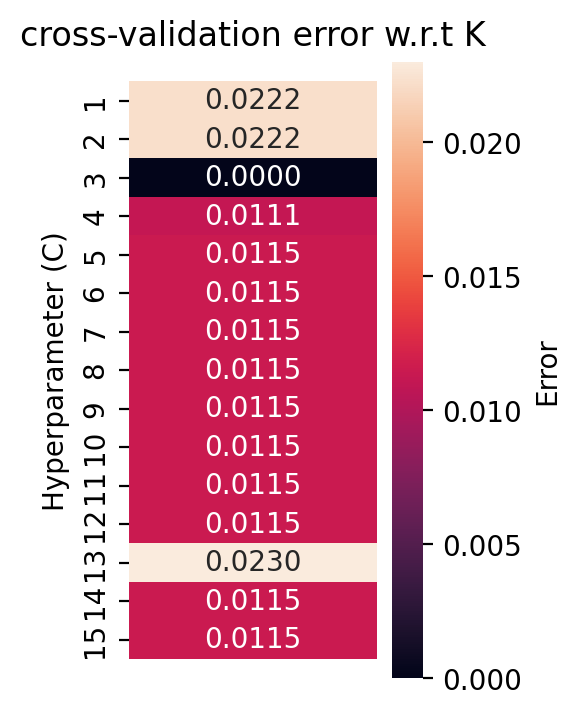

Best K: {'n_neighbors': 3}
Test error: 0.0337078651685393
Test accuracy: 0.9662921348314607
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1123]:
# 50% Training and 50% Testing 
wine_x_train_50, wine_x_test_50, wine_y_train_50, wine_y_test_50 = train_test_split(wine_x, wine_y, test_size=0.5)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(wine_x_train_50, wine_x_test_50, wine_y_train_50, wine_y_test_50, k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_wine_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


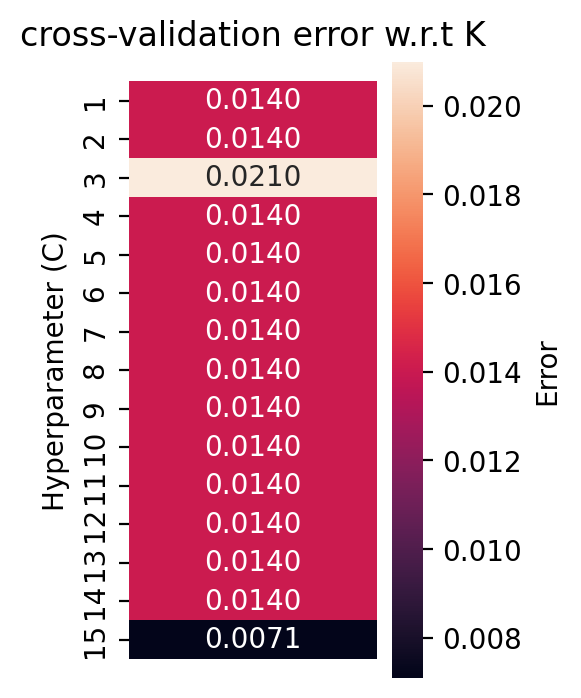

Best K: {'n_neighbors': 3}
Test error: 0.0
Test accuracy: 1.0
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1124]:
# 80% Training and 20% Testing 
wine_x_train_80, wine_x_test_20, wine_y_train_80, wine_y_test_20 = train_test_split(wine_x, wine_y, test_size=0.2)
opt_C, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcKNNMetrics(wine_x_train_80, wine_x_test_20, wine_y_train_80, wine_y_test_20,k_range)

draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_wine_accs.append(test_accuracy)

#### KNN for cancer

Fitting 3 folds for each of 15 candidates, totalling 45 fits


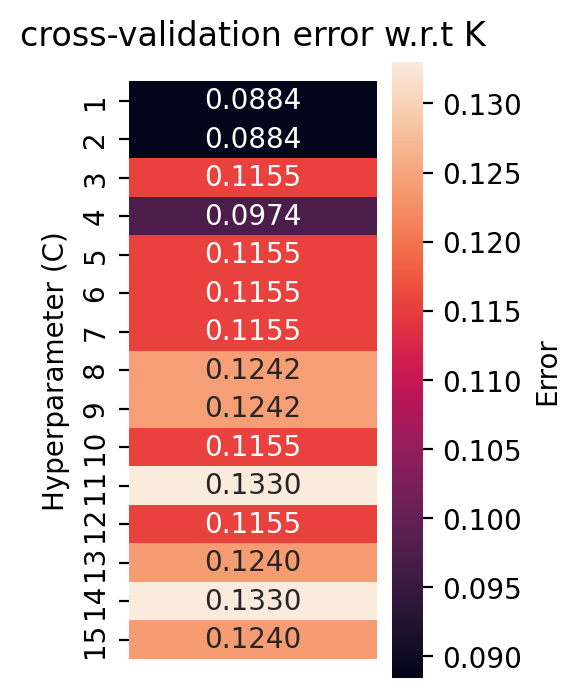

Best K: {'n_neighbors': 1}
Test error: 0.08991228070175439
Test accuracy: 0.9100877192982456
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1126]:
knn_cancer_accs = []

# 20% Training and 80% Testing 
cancer_x_train_20, cancer_x_test_80, cancer_y_train_20, cancer_y_test_80 = train_test_split(cancer_x, cancer_y, test_size=0.8)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error   =  calcKNNMetrics(cancer_x_train_20, cancer_x_test_80, cancer_y_train_20, cancer_y_test_80,  k_range)


draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_cancer_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


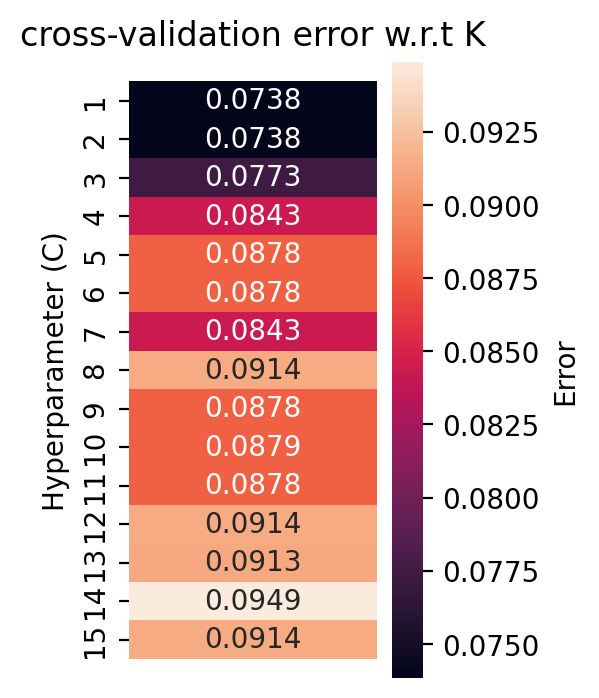

Best K: {'n_neighbors': 1}
Test error: 0.08421052631578951
Test accuracy: 0.9157894736842105
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1127]:
# 50% Training and 50% Testing 
cancer_x_train_50, cancer_x_test_50, cancer_y_train_50, cancer_y_test_50 = train_test_split(cancer_x, cancer_y, test_size=0.5)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error =  calcKNNMetrics(cancer_x_train_50, cancer_x_test_50, cancer_y_train_50, cancer_y_test_50,  k_range)


draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_cancer_accs.append(test_accuracy)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


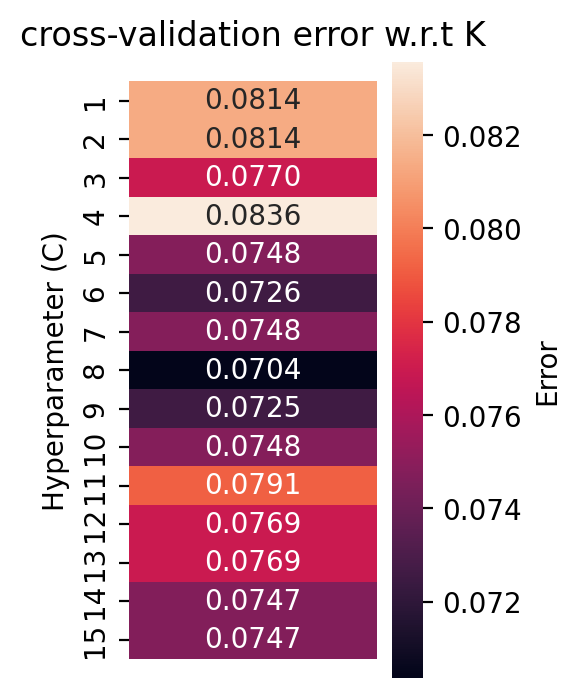

Best K: {'n_neighbors': 8}
Test error: 0.07017543859649122
Test accuracy: 0.9298245614035088
Avg training error per K: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per K: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1128]:
# 80% Training and 20% Testing 
cancer_x_train_80, cancer_x_test_20, cancer_y_train_80, cancer_y_test_20 = train_test_split(cancer_x, cancer_y, test_size=0.2)
opt_K, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error =  calcKNNMetrics(cancer_x_train_80, cancer_x_test_20, cancer_y_train_80, cancer_y_test_20,  k_range)


draw_heatmap(cross_validation_errors, k_range, title='cross-validation error w.r.t K')
print("Best K: {}".format(opt_K))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per K: {}".format(mean_training_errors))
print("Avg training accuracies per K: {}".format(mean_training_accuracies))

knn_cancer_accs.append(test_accuracy)

In [1129]:
average_knn_accuracy = np.sum([a + b + c for a, b, c in zip(knn_iris_accs, knn_wine_accs, knn_cancer_accs)]) / 9
print(knn_iris_accs)
print(knn_wine_accs)
print(knn_cancer_accs)

print("Average KNN accuracy {}".format(average_knn_accuracy))

[1.0, 1.0, 1.0]
[0.958041958041958, 0.9662921348314607, 1.0]
[0.9100877192982456, 0.9157894736842105, 0.9298245614035088]
Average KNN accuracy 0.9644484274732648


### Decision Tree

In [1131]:
import seaborn as sns
from sklearn import tree

D_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [1132]:
def calcDTMetrics(X_train,X_test, Y_train,Y_test, D_list):

    estimator = tree.DecisionTreeClassifier(criterion='entropy',random_state = 1 )

    param_grid = {'max_depth': D_list}
    grid_search = GridSearchCV(estimator, param_grid, cv=3, return_train_score=True, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, Y_train)    
    
    # Gather the results
    opt_D = grid_search.best_params_['max_depth']
                                                 
                                        
    cross_validation_accuracies =  grid_search.cv_results_['mean_test_score']
    cross_validation_errors = 1 - cross_validation_accuracies.reshape(-1,1)
    
    mean_training_accuracies = grid_search.cv_results_['mean_train_score']
    mean_training_errors = 1 - mean_training_accuracies.reshape(-1,1)
    
    Y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_pred, Y_test)
    test_error = 1 - sum(Y_pred == Y_test) / len(X_test)

    
    return opt_D ,cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error

### Decision tree for iris

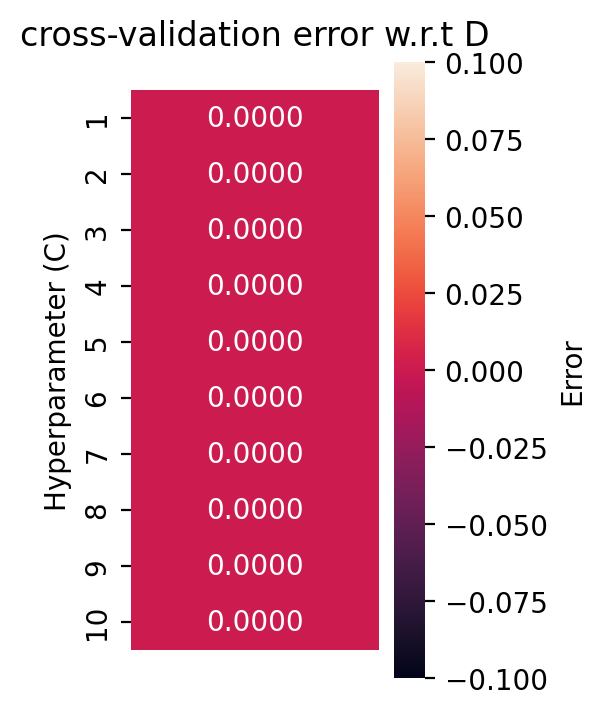

Best D: 1
Test error: 0.0
Test accuracy: 1.0
Avg training error per D: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per D: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1134]:
dt_iris_accs = []
# 20% Training and 80% Testing 
iris_x_train_20, iris_x_test_80, iris_y_train_20, iris_y_test_80 = train_test_split(iris_x, iris_y, test_size=0.8)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(iris_x_train_20, iris_x_test_80, iris_y_train_20, iris_y_test_80 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_iris_accs.append(test_accuracy)

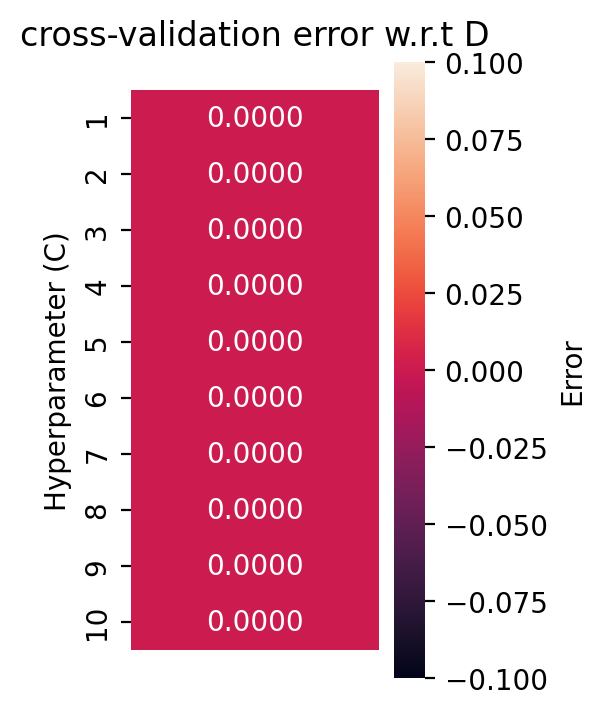

Best D: 1
Test error: 0.0
Test accuracy: 1.0
Avg training error per D: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per D: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1135]:
# 50% Training and 50% Testing 
iris_x_train_50, iris_x_test_50, iris_y_train_50, iris_y_test_50 = train_test_split(iris_x, iris_y, test_size=0.5)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(iris_x_train_50, iris_x_test_50, iris_y_train_50, iris_y_test_50 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_iris_accs.append(test_accuracy)

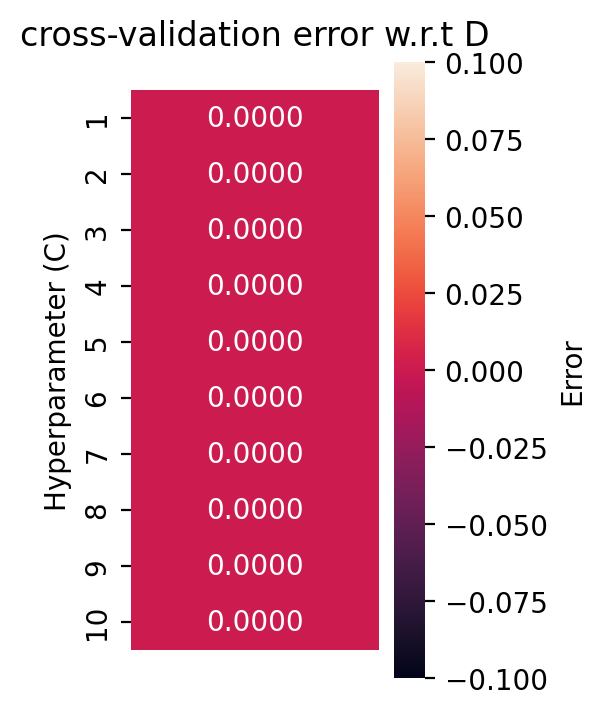

Best D: 1
Test error: 0.0
Test accuracy: 1.0
Avg training error per D: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Avg training accuracies per D: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [1136]:
# 80% Training and 20% Testing 
iris_x_train_80, iris_x_test_20, iris_y_train_80, iris_y_test_20 = train_test_split(iris_x, iris_y, test_size=0.2)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(iris_x_train_80, iris_x_test_20, iris_y_train_80, iris_y_test_20 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_iris_accs.append(test_accuracy)

### Decision tree for wine

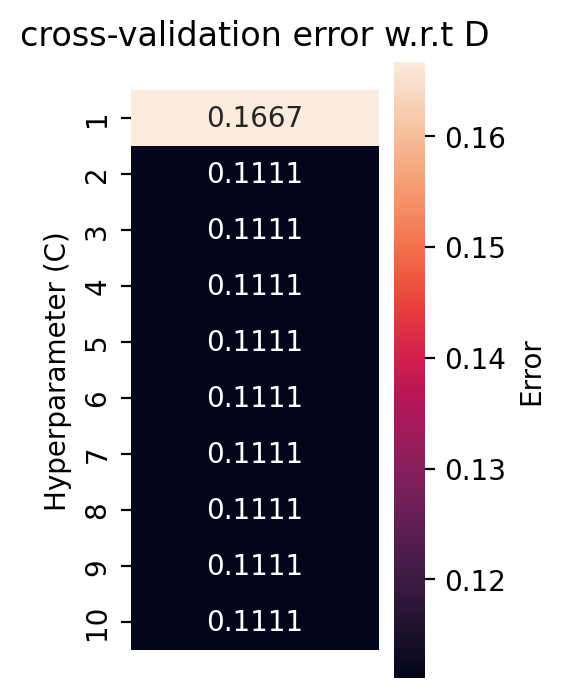

Best D: 2
Test error: 0.08391608391608396
Test accuracy: 0.916083916083916
Avg training error per D: [[0.02838164]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Avg training accuracies per D: [0.97161836 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [1138]:
dt_wine_accs = []
# 20% Training and 80% Testing 
wine_x_train_20, wine_x_test_80, wine_y_train_20, wine_y_test_80 = train_test_split(wine_x, wine_y, test_size=0.8)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(wine_x_train_20, wine_x_test_80, wine_y_train_20, wine_y_test_80 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_wine_accs.append(test_accuracy)

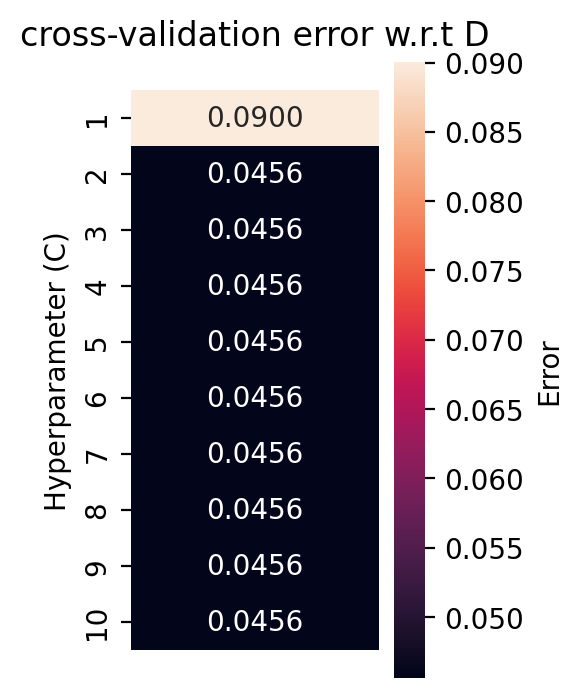

Best D: 2
Test error: 0.0449438202247191
Test accuracy: 0.9550561797752809
Avg training error per D: [[0.05621469]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Avg training accuracies per D: [0.94378531 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [1139]:
# 50% Training and 50% Testing 
wine_x_train_50, wine_x_test_50, wine_y_train_50, wine_y_test_50 = train_test_split(wine_x, wine_y, test_size=0.5)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(wine_x_train_50, wine_x_test_50, wine_y_train_50, wine_y_test_50 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_wine_accs.append(test_accuracy)

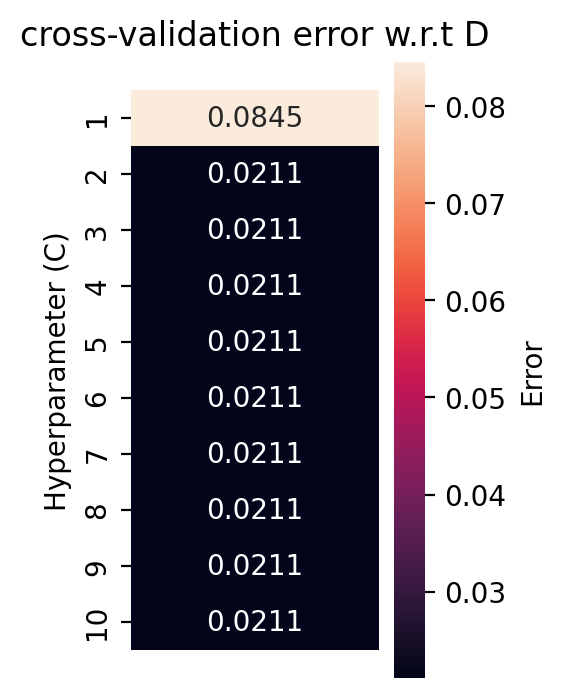

Best D: 2
Test error: 0.0
Test accuracy: 1.0
Avg training error per D: [[0.05640164]
 [0.0035461 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Avg training accuracies per D: [0.94359836 0.9964539  1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [1140]:
# 80% Training and 20% Testing 
wine_x_train_80, wine_x_test_20, wine_y_train_80, wine_y_test_20 = train_test_split(wine_x, wine_y, test_size=0.2)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(wine_x_train_80, wine_x_test_20, wine_y_train_80, wine_y_test_20 , D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_wine_accs.append(test_accuracy)

### Decision tree for cancer

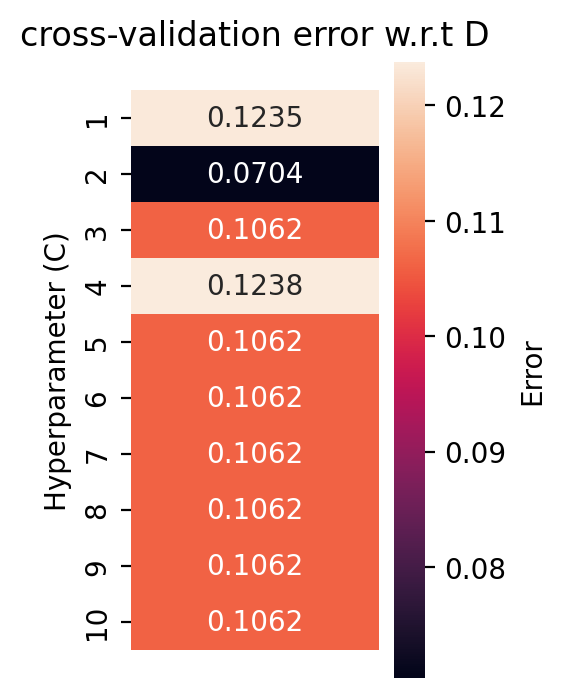

Best D: 2
Test error: 0.07236842105263153
Test accuracy: 0.9276315789473685
Avg training error per D: [[0.06631579]
 [0.02210526]
 [0.01333333]
 [0.00444444]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Avg training accuracies per D: [0.93368421 0.97789474 0.98666667 0.99555556 1.         1.
 1.         1.         1.         1.        ]


In [1142]:
dt_cancer_accs = []
# 20% Training and 80% Testing 
cancer_x_train_20, cancer_x_test_80, cancer_y_train_20, cancer_y_test_80 = train_test_split(cancer_x, cancer_y, test_size=0.8)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(cancer_x_train_20, cancer_x_test_80, cancer_y_train_20, cancer_y_test_80, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_cancer_accs.append(test_accuracy)

In [1143]:
average_dt_accuracy = np.sum([a + b + c for a, b, c in zip(dt_iris_accs, dt_wine_accs, dt_cancer_accs)]) / 9
print(dt_iris_accs)
print(dt_wine_accs)
print(dt_cancer_accs)
print(average_dt_accuracy)

[1.0, 1.0, 1.0]
[0.916083916083916, 0.9550561797752809, 1.0]
[0.9276315789473685]
0.3159683883368094


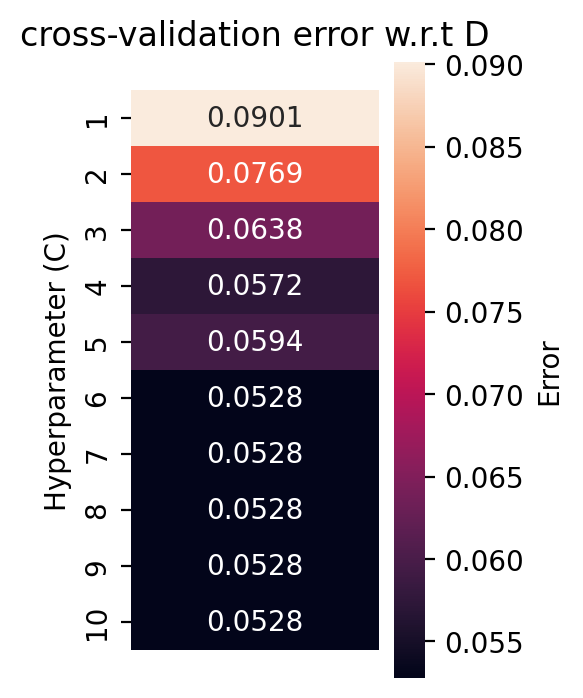

Best D: 6
Test error: 0.10526315789473684
Test accuracy: 0.8947368421052632
Avg training error per D: [[0.06704519]
 [0.04837951]
 [0.02528444]
 [0.0186874 ]
 [0.00329671]
 [0.00110011]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
Avg training accuracies per D: [0.93295481 0.95162049 0.97471556 0.9813126  0.99670329 0.99889989
 1.         1.         1.         1.        ]


In [1144]:
# 80% Training and 20% Testing 
cancer_x_train_80, cancer_x_test_20, cancer_y_train_80, cancer_y_test_20 = train_test_split(cancer_x, cancer_y, test_size=0.2)
opt_D, cross_validation_accuracies, cross_validation_errors, mean_training_accuracies, mean_training_errors, test_accuracy, test_error  =  calcDTMetrics(cancer_x_train_80, cancer_x_test_20, cancer_y_train_80, cancer_y_test_20, D_list)

draw_heatmap(cross_validation_errors, D_list, title='cross-validation error w.r.t D')
print("Best D: {}".format(opt_D))
print("Test error: {}".format(test_error))
print("Test accuracy: {}".format(test_accuracy))
print("Avg training error per D: {}".format(mean_training_errors))
print("Avg training accuracies per D: {}".format(mean_training_accuracies))

dt_cancer_accs.append(test_accuracy)

### test

Error: SVM - iris has mismatched dimensions: splits=3, accs=2


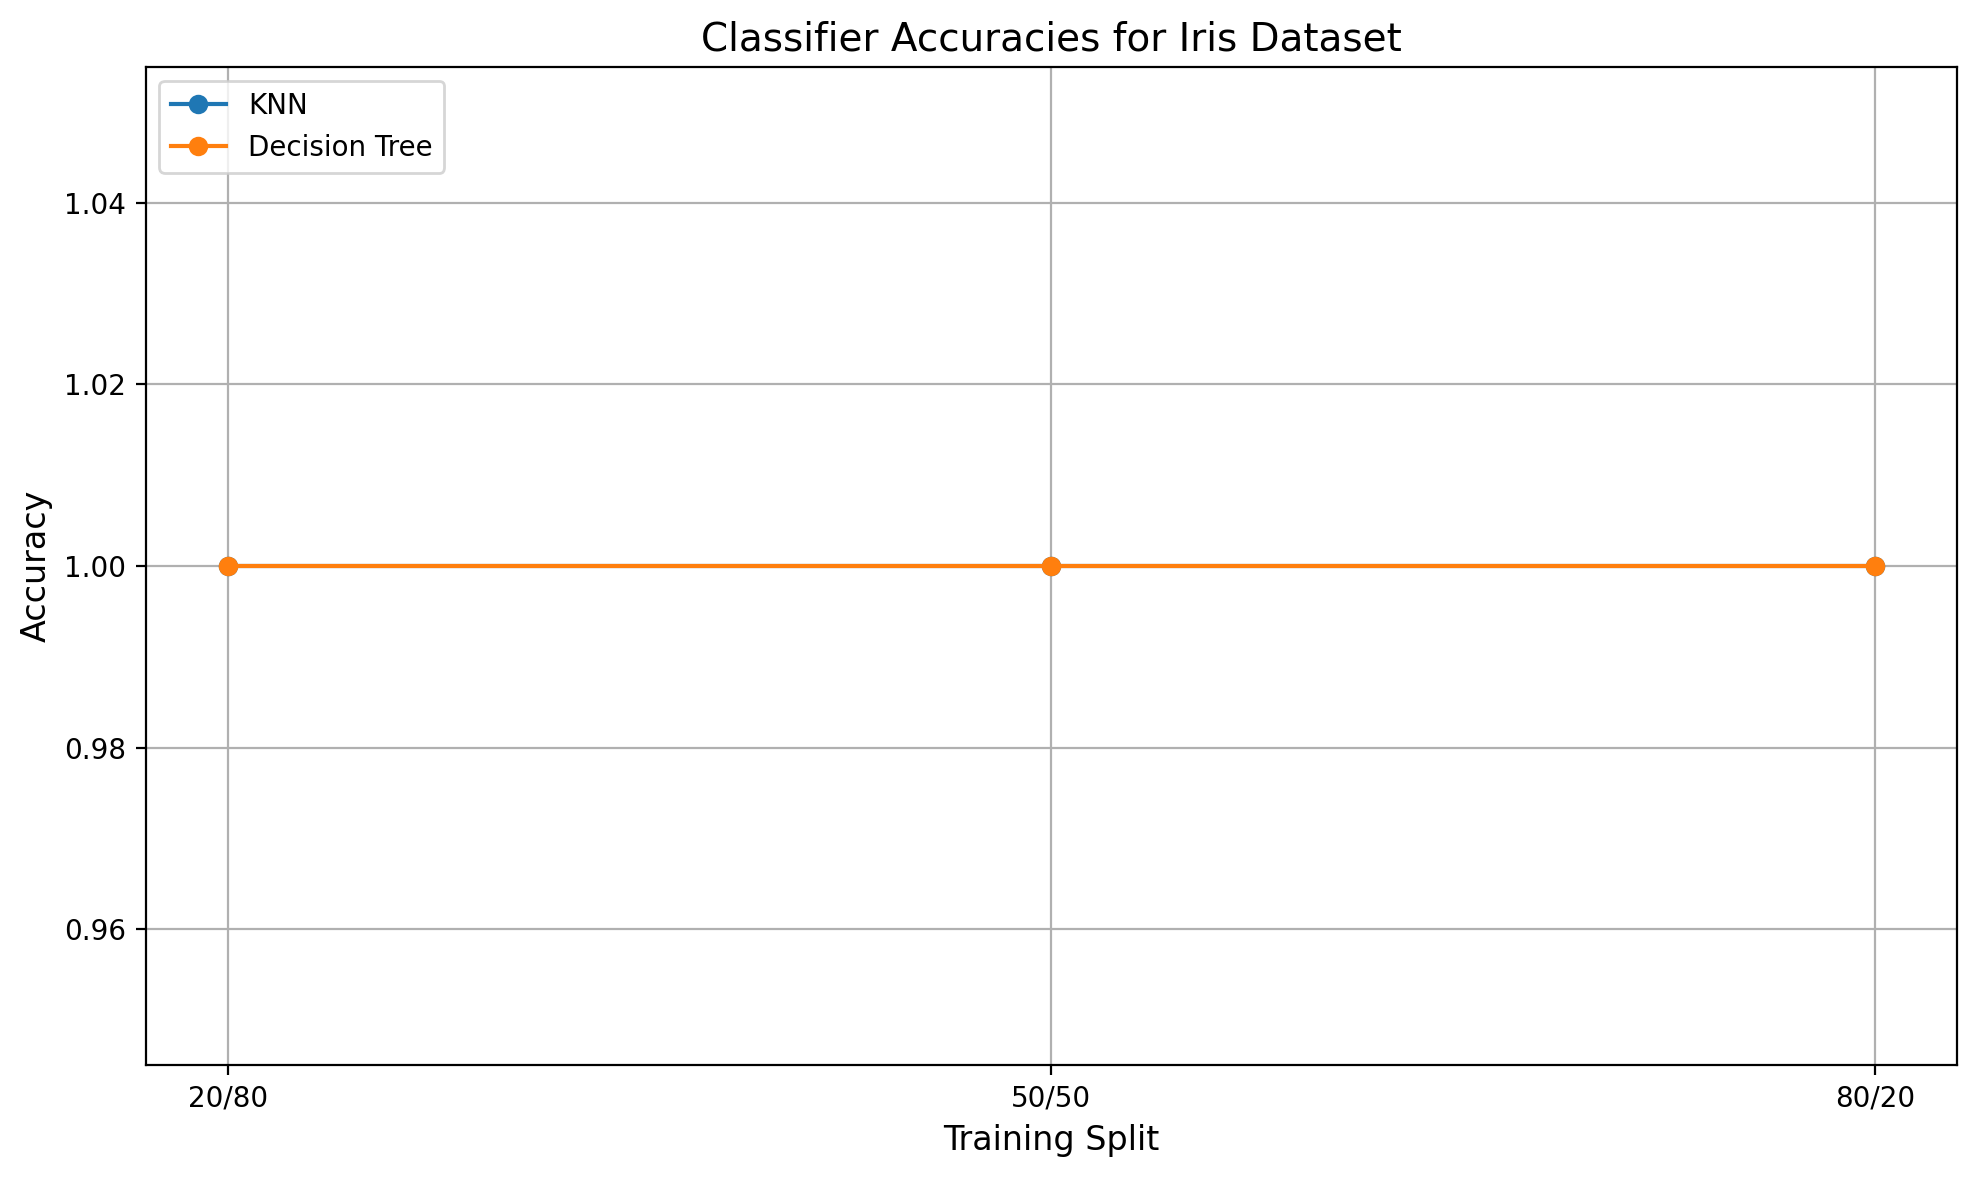

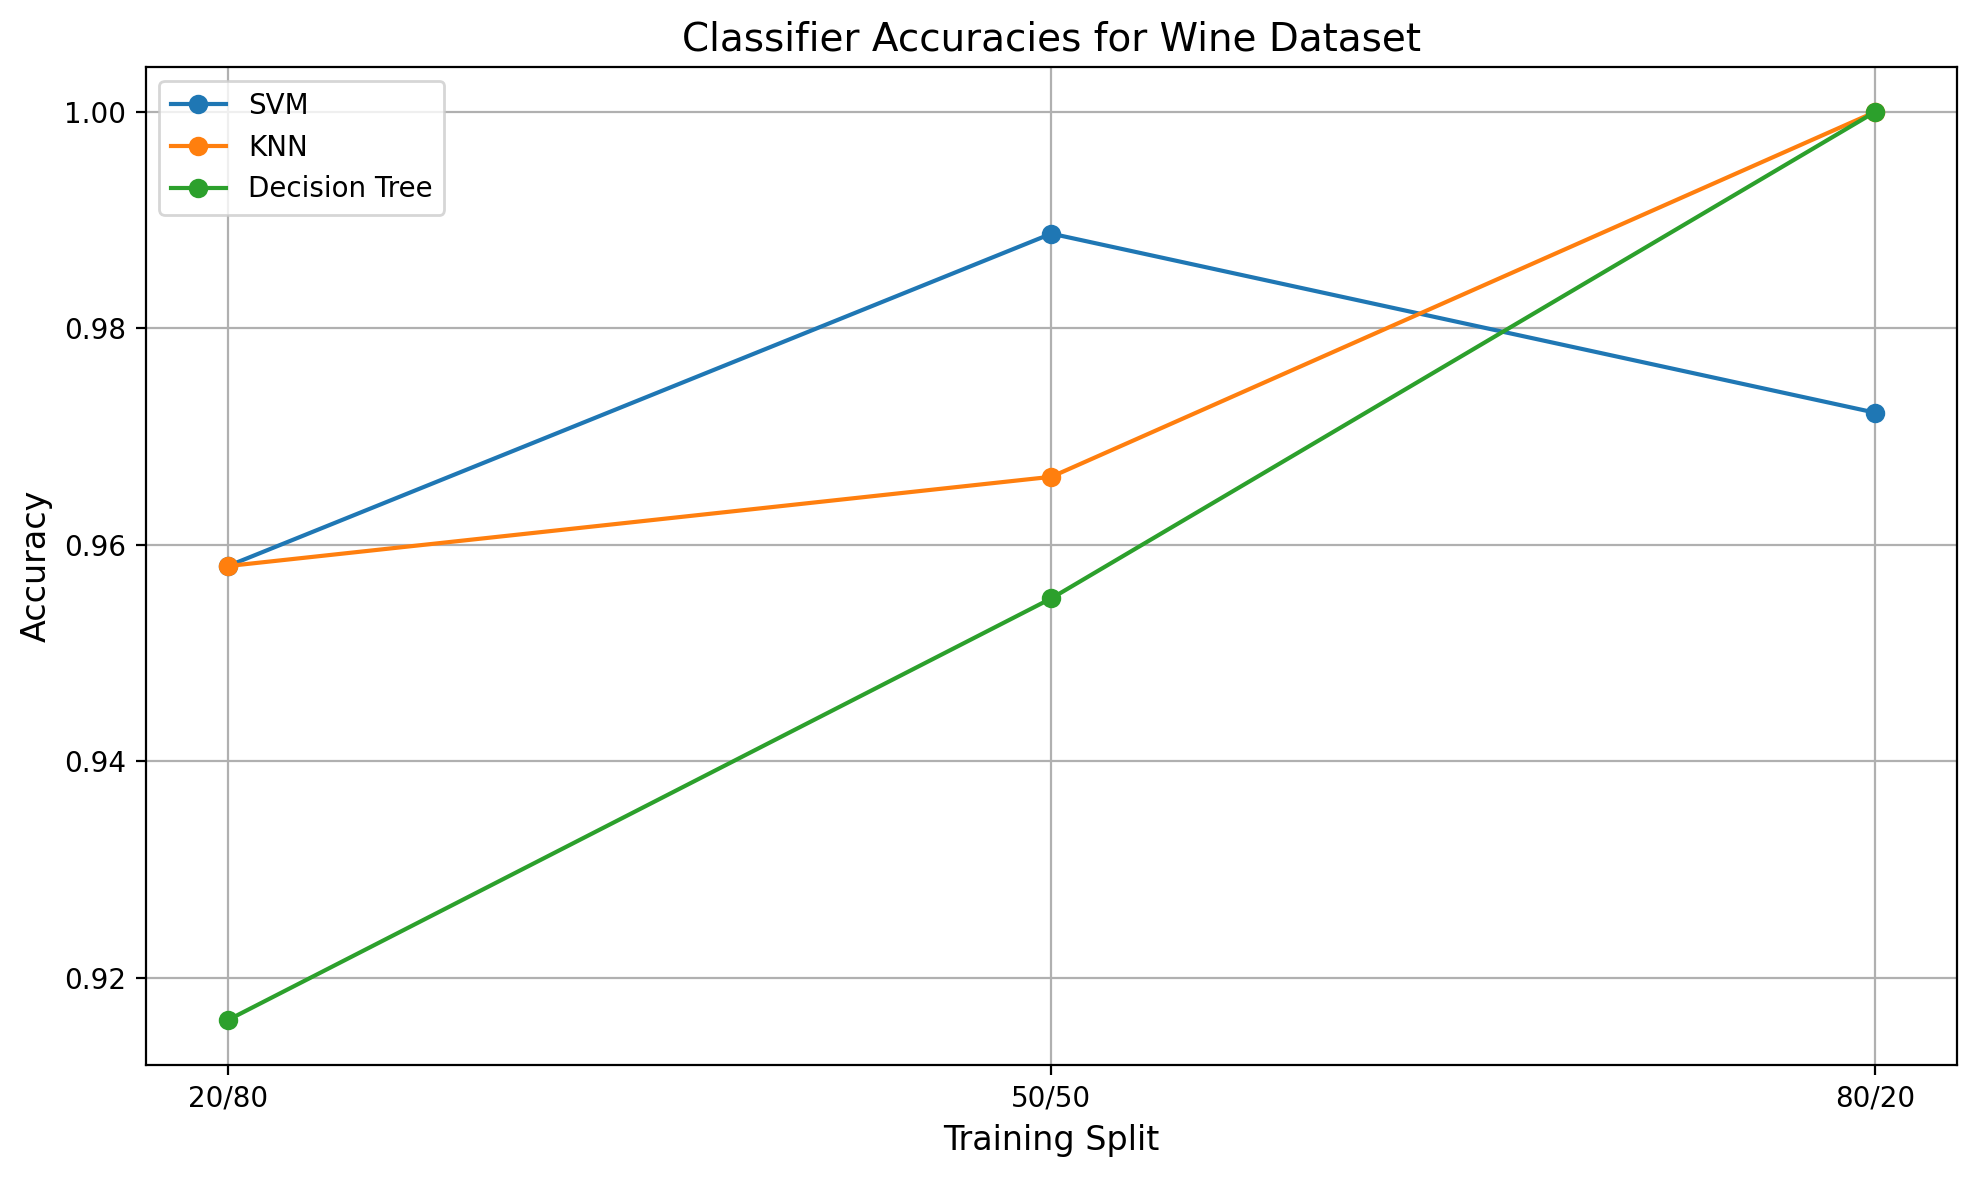

Error: Decision Tree - cancer has mismatched dimensions: splits=3, accs=2


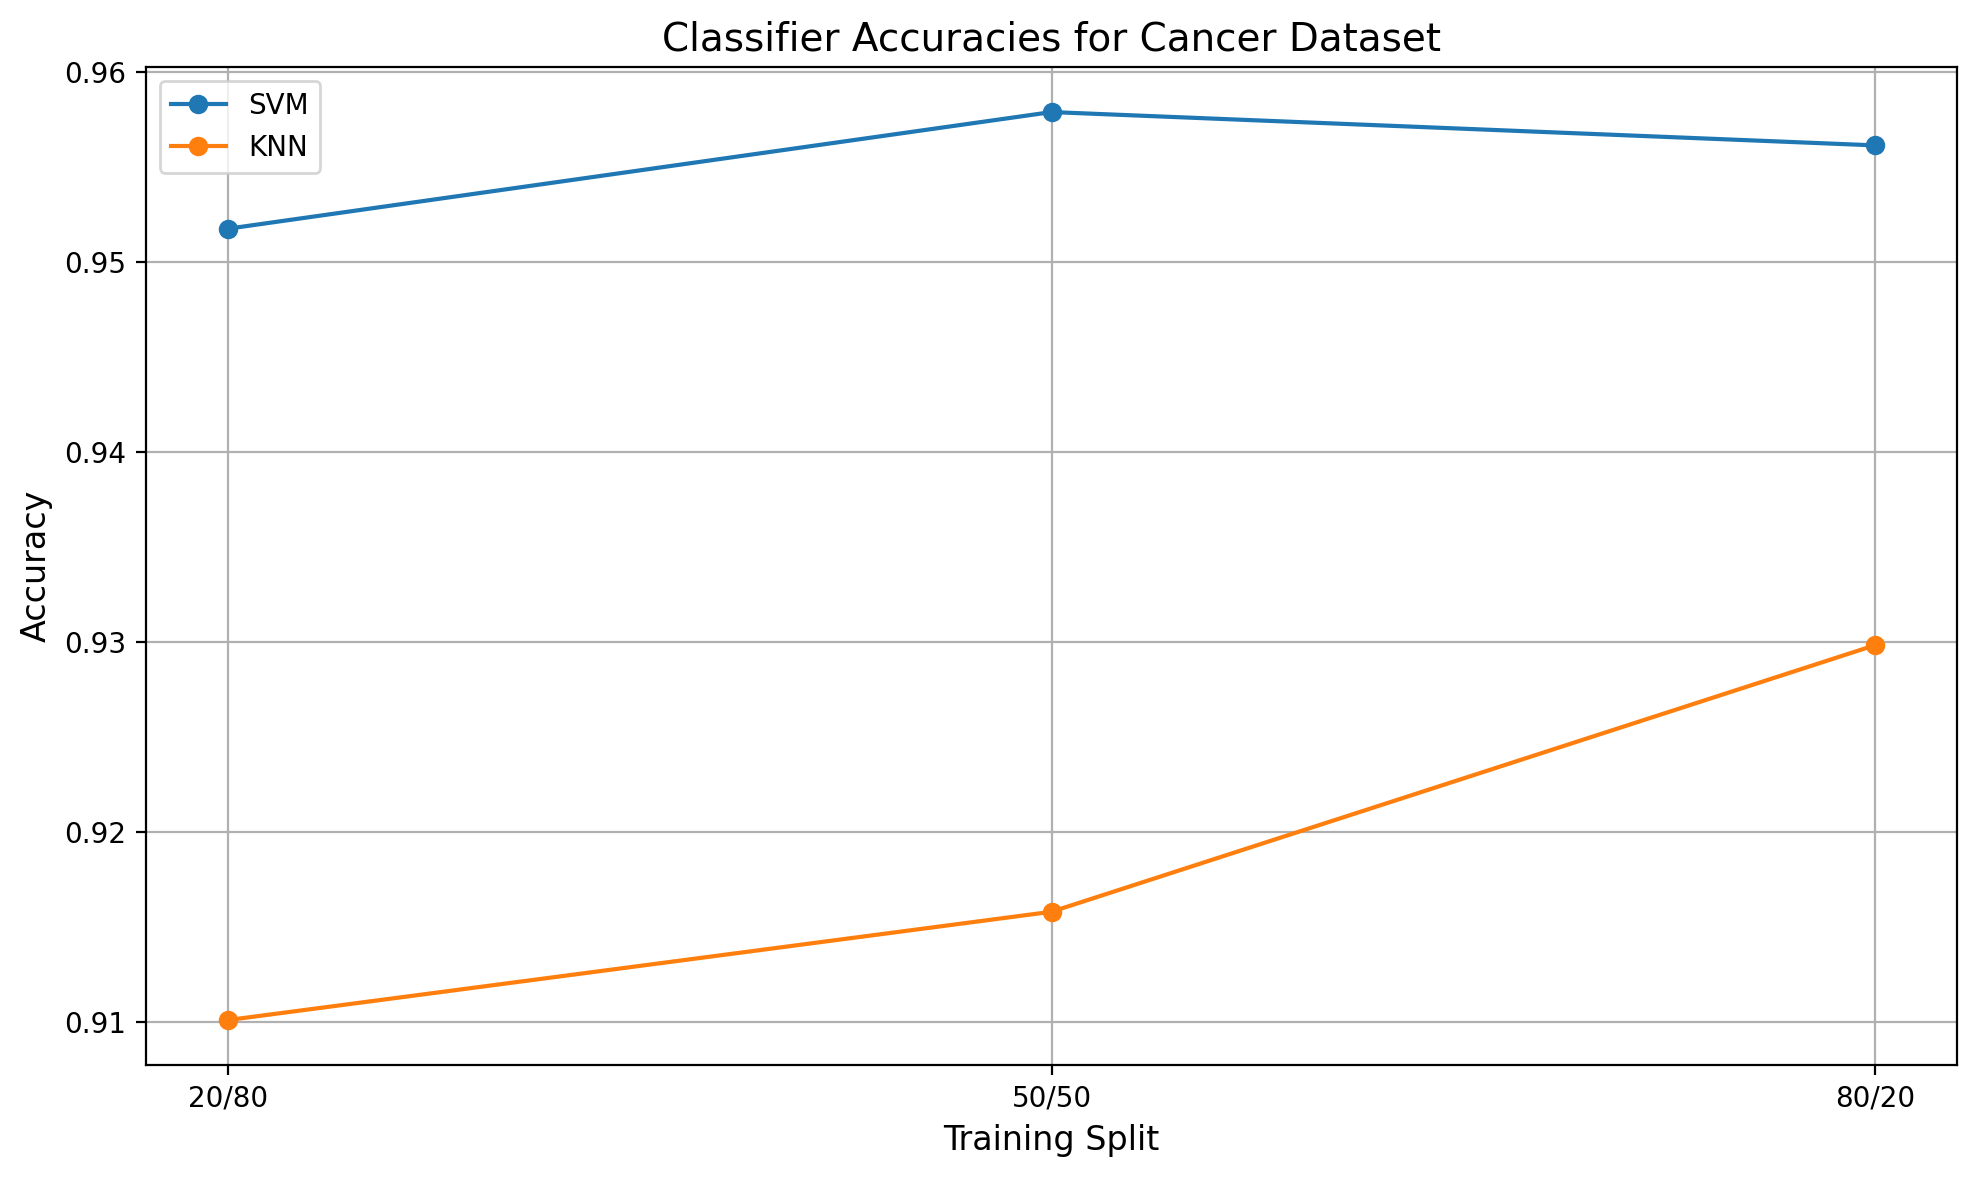

In [1146]:
# Data preparation
datasets = ['iris', 'wine', 'cancer']
classifiers = ['SVM', 'KNN', 'Decision Tree']
splits = ['20/80', '50/50', '80/20']

# Plotting
for i, dataset in enumerate(datasets):
    plt.figure(figsize=(10, 6))
    plt.title(f'Classifier Accuracies for {dataset.capitalize()} Dataset', fontsize=14)
    plt.xlabel('Training Split', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)

    for classifier in classifiers:
        accs = data[classifier][i]  # Accuracy values for the current classifier and dataset

        # Validate dimensions
        if len(accs) != len(splits):
            print(f"Error: {classifier} - {dataset} has mismatched dimensions: splits={len(splits)}, accs={len(accs)}")
            continue

        # Plot accuracies
        plt.plot(splits, accs, marker='o', label=classifier)

    plt.grid(True)
    plt.legend(loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()


/var/folders/4d/hndlnrrx2ql6ym7gzbwjctwc0000gn/T/ipykernel_61107/264225311.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Accuracy', y='Classifier', data=df_data, palette='viridis', errorbar=None)


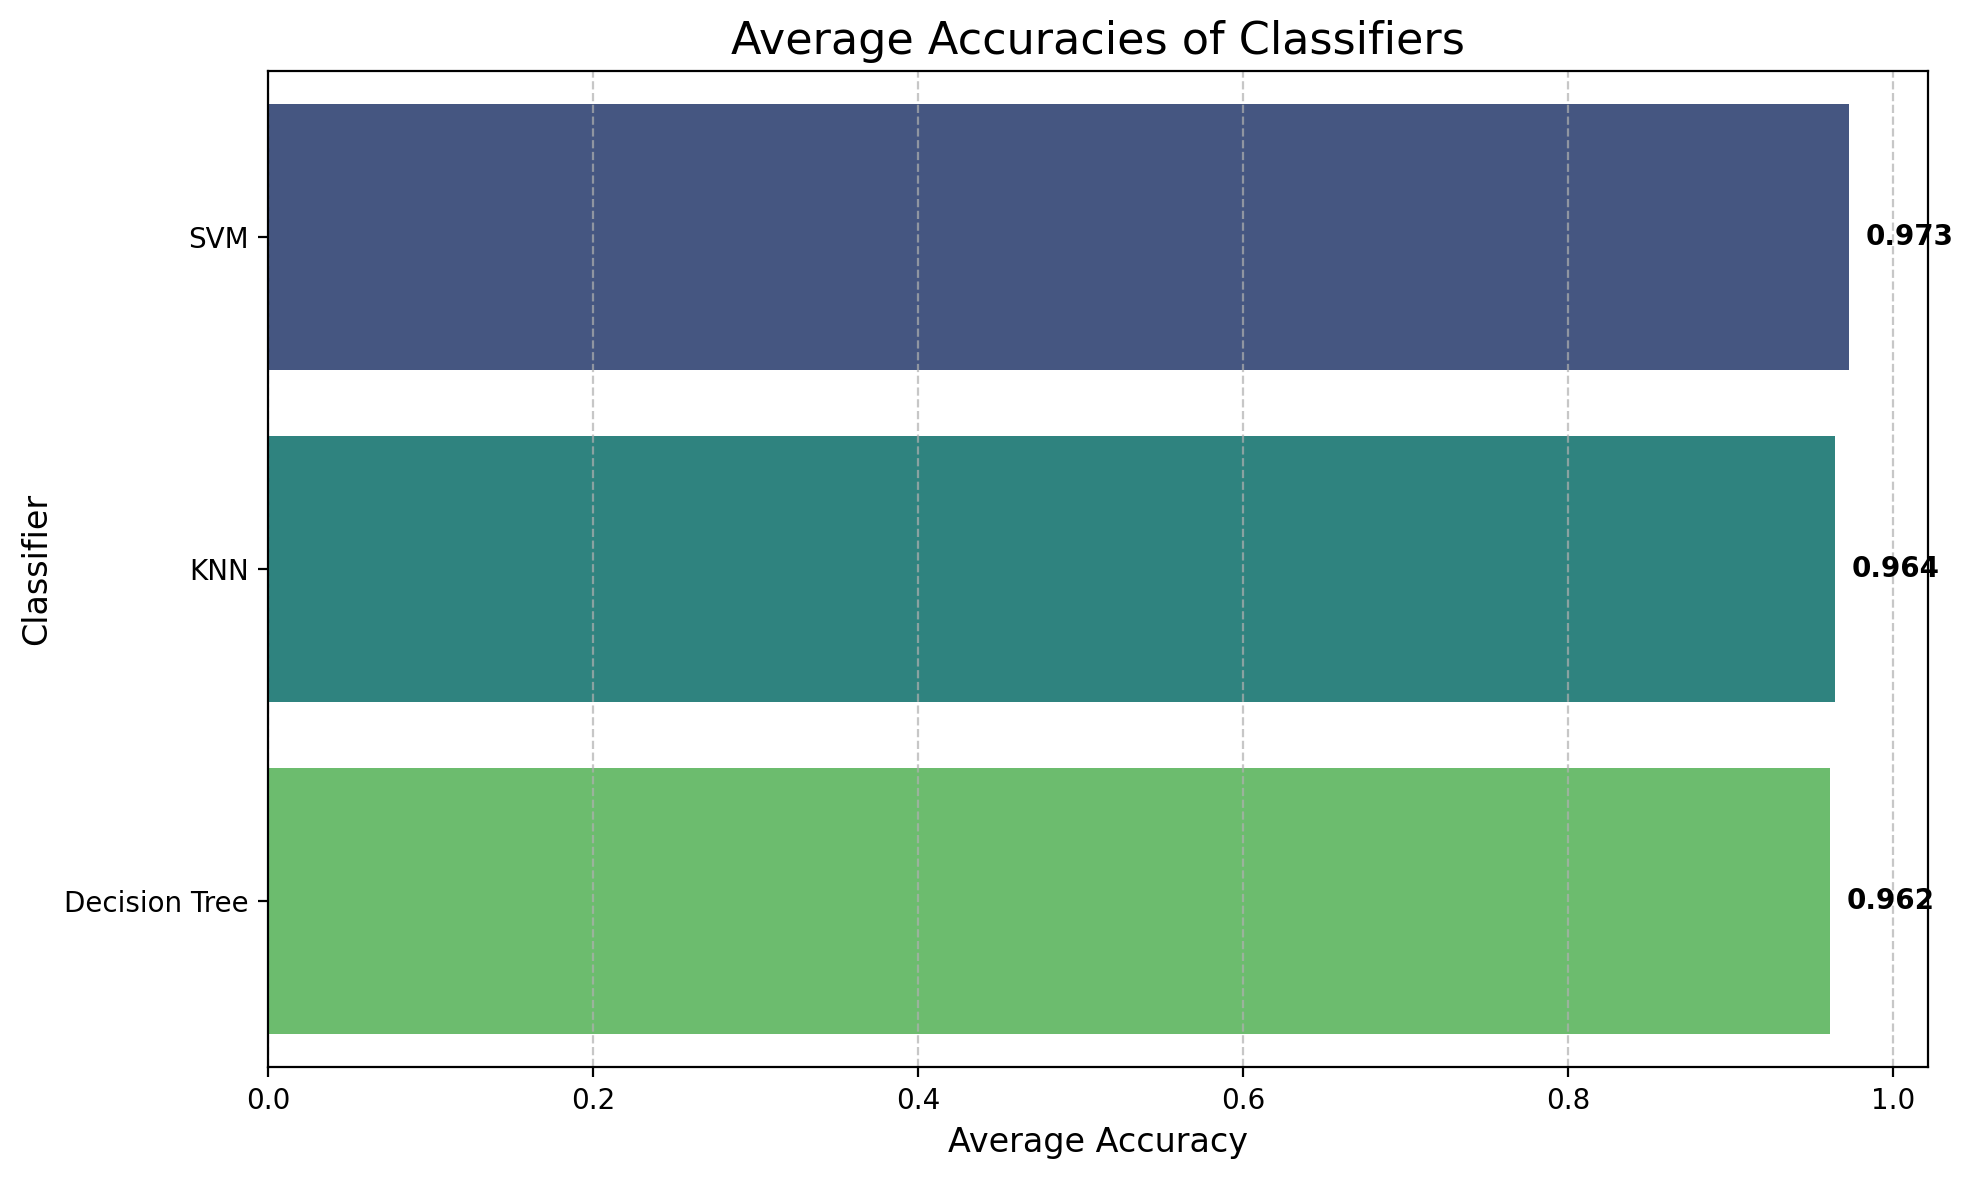

In [1147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten data[classifier] if needed and compute average accuracies
average_accuracies = []
for classifier in classifiers:
    accuracies = [item for sublist in data[classifier] for item in sublist]  # Flatten nested lists
    average_accuracies.append(np.mean(accuracies))

# Create DataFrame for visualization
df_data = pd.DataFrame({
    'Classifier': classifiers,
    'Average Accuracy': average_accuracies
})

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Accuracy', y='Classifier', data=df_data, palette='viridis', errorbar=None)
plt.title('Average Accuracies of Classifiers', fontsize=16)
plt.xlabel('Average Accuracy', fontsize=12)
plt.ylabel('Classifier', fontsize=12)

# Add labels for each bar
for i, v in enumerate(average_accuracies):
    plt.text(v + 0.01, i, f'{v:.3f}', color='black', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
